In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.tsa.stattools import adfuller

In [10]:
median_price = pd.read_csv('../data/median_comp_price.csv')
median_price.drop('date.1', axis = 1, inplace=True)

In [11]:
median_price = median_price.set_index(pd.DatetimeIndex(median_price['date']))
median_price.drop('date', axis =1, inplace=True)


In [12]:
median_price.isnull().sum()

Portland_median_price    2
SF_median_price          5
dtype: int64

In [13]:
median_price['Portland_median_price'] = median_price['Portland_median_price'].fillna(method = 'ffill')
# median_price['x1_interpolated'] = median_price['x1'].interpolate(method = 'time')

median_price['SF_median_price'] = median_price['SF_median_price'].fillna(method = 'ffill')

sf_median_price = median_price[['SF_median_price']]

In [14]:
sf_median_price = sf_median_price[1:132]




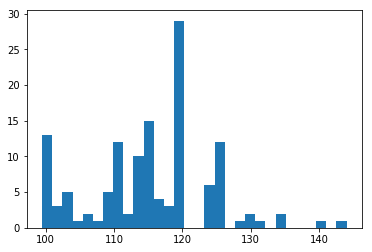

In [15]:
plt.hist(sf_median_price['SF_median_price'], bins=30);

In [16]:
sf_median_price.head()

,SF_median_price
date,
2015-05-10,120.0
2015-05-17,124.5
2015-05-24,125.0
2015-05-31,120.0
2015-06-07,125.0


In [17]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(52).mean()
    rolstd = timeseries.rolling(52).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
  
    
#     #Perform Dickey-Fuller test:
#     print('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print(dfoutput)

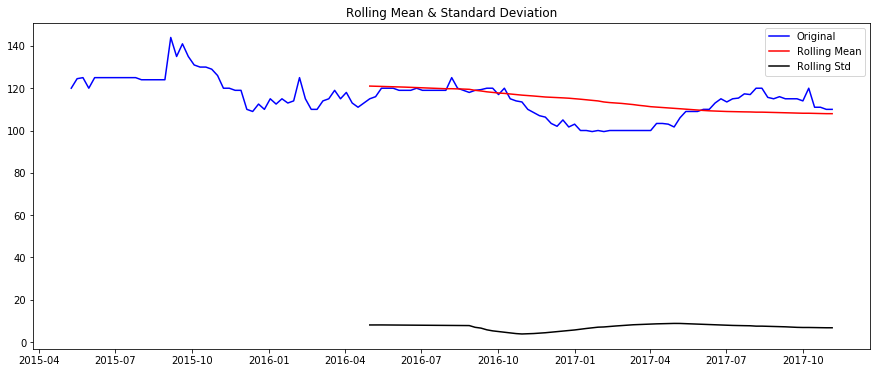

In [18]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
test_stationarity(sf_median_price)

In [19]:

X = sf_median_price['SF_median_price'].values
result = adfuller(X)
print('Augmented Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
# Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root,
# meaning it is non-stationary. It has some time dependent structure.
# Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does 
# not have a unit root, meaning it is stationary. It does not have time-dependent structure.

# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Augmented Dickey-Fuller Statistic: -1.724021
p-value: 0.418781
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


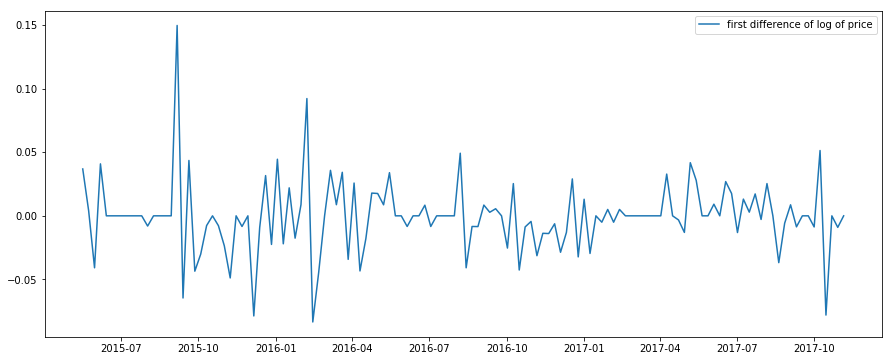

In [20]:
ts_log = np.log(sf_median_price)

ts_log_diff = ts_log - ts_log.shift()

plt.plot(ts_log_diff, label = 'first difference of log of price')
plt.legend()


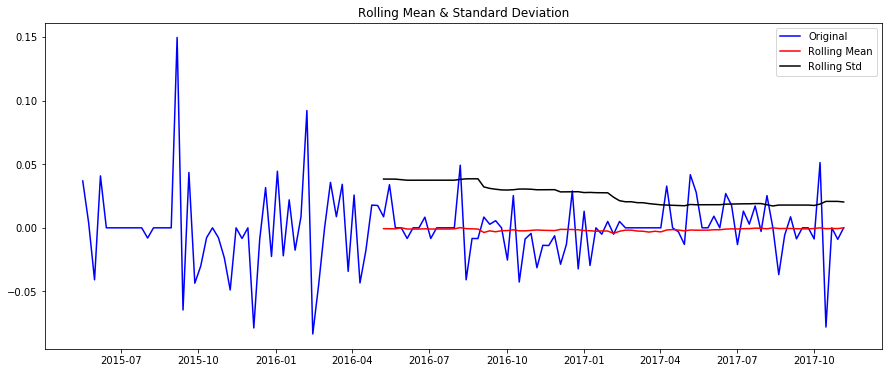

In [21]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

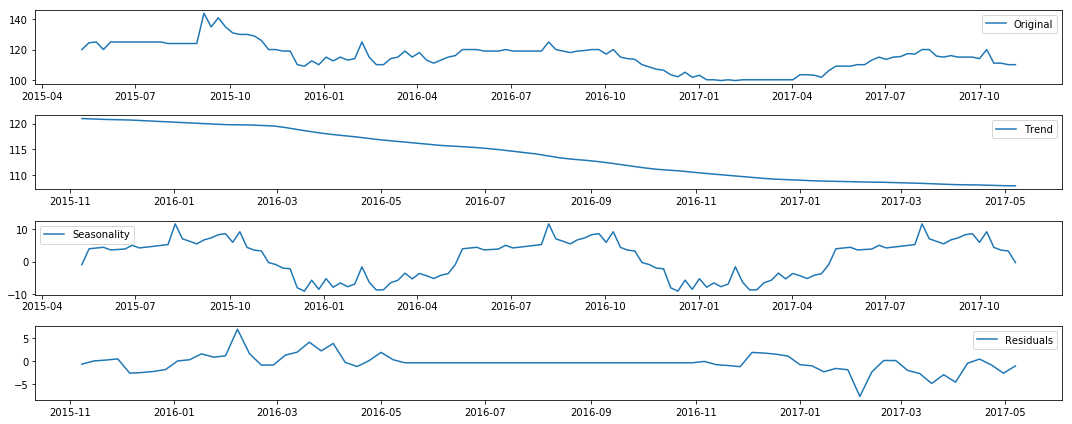

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sf_median_price)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(sf_median_price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

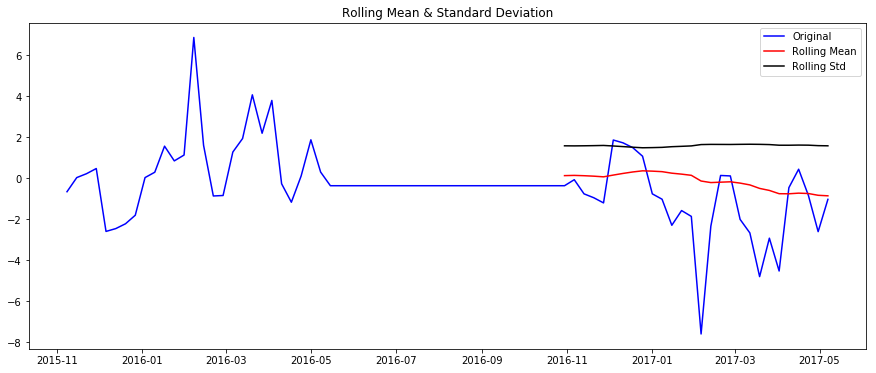

In [24]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

In [25]:
result = adfuller(ts_decompose['SF_median_price'].values)
print('Augmented Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

Augmented Dickey-Fuller Statistic: -4.647440
p-value: 0.000106
Critical Values:
	1%: -3.517
	5%: -2.899
	10%: -2.587


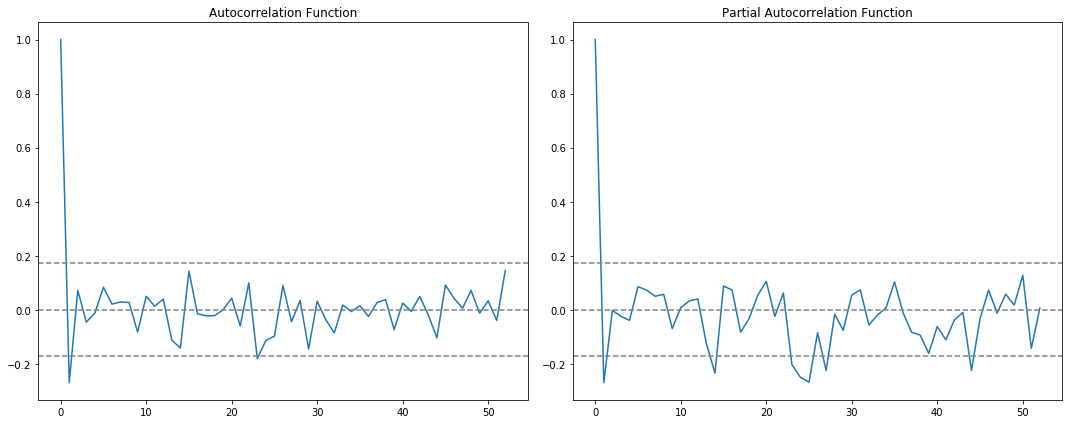

In [26]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=52)
lag_pacf = pacf(ts_log_diff, nlags=52, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidim

Text(0.5, 1.0, 'RSS: 0.00006080')

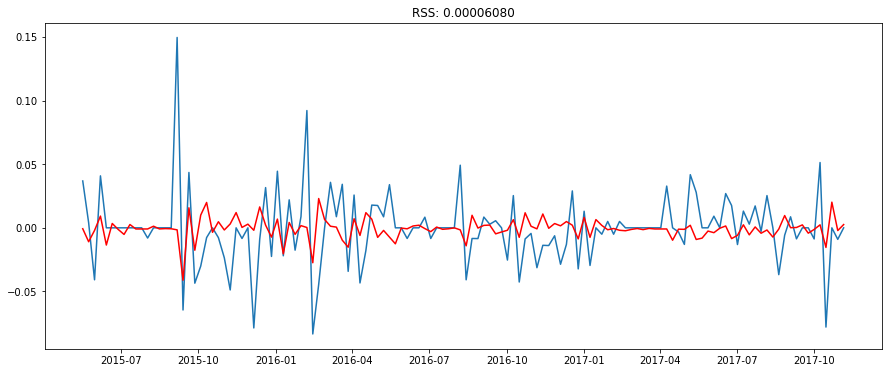

In [27]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(5, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
rss = sum(results_AR.fittedvalues - ts_log_diff['SF_median_price']) ** 2
plt.title('RSS: %.8f'%rss)

In [ ]:
sum(results_AR.fittedvalues - ts_log_diff['SF_median_price']) ** 2